In [118]:
import geopandas as gpd
import pandas as pd

In [119]:
#world shapefile
poly=gpd.read_file("dataset/wb_countries_admin0_10m/wb_countries_admin0_10m.shp")

In [120]:
#check crs
poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [121]:
poly.columns

Index(['OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN', 'FORMAL_FR',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2', 'ISO_A3',
       'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE',
       'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU',
       'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL',
       'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH',
       'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [124]:
poly.shape

(251, 53)

In [45]:
from shapely import wkt
#climate point data 2017
climate17 = pd.read_csv('dataset/temp_point_17.csv')
climate17['geometry'] = climate17['geometry'].apply(wkt.loads)
gclimate17 = gpd.GeoDataFrame(climate17)

In [47]:
gclimate17.crs="EPSG:3857"

In [48]:
gclimate17.head()

,FID,id_punto,agno,temp_anual,geometry
0,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,0,2017,-16.38,POINT (-4202310.777 18546349.319)
1,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,2,2017,-16.48,POINT (-4090991.287 18546349.319)
2,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,4,2017,-16.68,POINT (-3979671.796 18546349.319)
3,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,6,2017,-16.50,POINT (-3868352.305 18546349.319)
4,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,7,2017,-16.46,POINT (-3812692.560 18546349.319)


In [107]:
gclimate17.shape

(66880, 5)

In [56]:
gclimate17=gclimate17.to_crs("EPSG:4326")

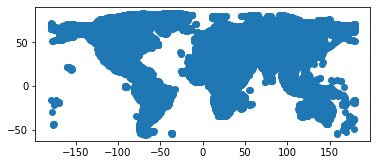

In [57]:
gclimate17.plot()

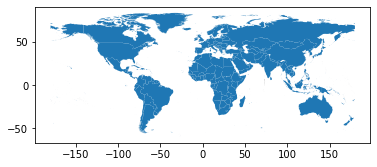

In [51]:
poly.plot()

In [59]:
poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
poly.head()

,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,None,260580739,17,3028000.0,2017,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,2,Admin-0 country,2,Sovereign country,Malaysia,None,31381992,15,863000.0,2017,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,3,Admin-0 country,2,Sovereign country,Republic of Chile,None,17789267,14,436100.0,2017,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,None,11138234,14,78350.0,2017,...,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,5,Admin-0 country,2,Sovereign country,Republic of Peru,None,31036656,15,410400.0,2017,...,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [82]:
from geopandas.tools import sjoin
points_polys =gpd.sjoin(gclimate17, poly, how="left")
points_polys.head()

,FID,id_punto,agno,temp_anual,geometry,index_right,OBJECTID,featurecla,LEVEL,TYPE,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area
0,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,0,2017,-16.38,POINT (-37.75000 83.75000),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,2,2017,-16.48,POINT (-36.75000 83.75000),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,4,2017,-16.68,POINT (-35.75000 83.75000),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,6,2017,-16.50,POINT (-34.75000 83.75000),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,7,2017,-16.46,POINT (-34.25000 83.75000),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
points_polys["OBJECTID"].unique()

array([ nan, 165., 151.,  46.,  51., 150.,  53.,  52., 177., 211.,  49.,
        77.,  50.,  69.,  42.,  33.,  76.,  40.,  48.,  75., 238.,   9.,
        32.,  45.,  58.,  21.,  47.,  74.,  87.,  73.,  72., 137.,  90.,
        89., 101., 100.,  94.,  39., 175., 128., 106.,  65., 127.,  63.,
        59.,  67., 138.,  25., 136.,  61.,  60.,  64.,  62.,  78.,  68.,
        41.,  91., 126.,  24., 118.,  71.,  20.,  88.,  17.,  26.,   7.,
         8.,  12.,  70.,  10., 139., 152., 103., 157., 140., 112., 123.,
        31., 159., 102., 124.,  57.,  95., 173.,  38., 144., 111.,  54.,
       131., 162.,  84.,  66., 109., 110., 107., 158., 198., 195., 169.,
       114., 153.,  86.,  96., 132., 206.,  28., 145., 113.,  13.,  55.,
        97., 186., 161., 142., 134., 148.,  81.,  98.,  85., 155.,  15.,
        27., 184., 147., 146.,  14.,  93.,  83.,  80., 154.,  23., 170.,
        82.,   2.,  22.,  43.,   1.,  30., 116.,  16., 129.,  29., 143.,
       160., 133.,   5., 122.,  19., 121., 156.,  9

In [66]:
sum(points_polys["index_right"].isnull())

5558

In [88]:
points_polys=points_polys.dropna(axis=0,subset=["OBJECTID"])

In [89]:
points_polys

,FID,id_punto,agno,temp_anual,geometry,index_right,OBJECTID,featurecla,LEVEL,TYPE,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area
22,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,42,2017,-16.72,POINT (-37.75000 83.25000),164.0,165.0,Admin-0 country,2.0,Country,...,Гренландия,Grönland,Grönland,Greenland,格陵兰,Greenland (Den.),Name in italic,Other,1003.536177,659.877452
23,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,43,2017,-16.60,POINT (-37.25000 83.25000),164.0,165.0,Admin-0 country,2.0,Country,...,Гренландия,Grönland,Grönland,Greenland,格陵兰,Greenland (Den.),Name in italic,Other,1003.536177,659.877452
24,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,44,2017,-16.69,POINT (-36.75000 83.25000),164.0,165.0,Admin-0 country,2.0,Country,...,Гренландия,Grönland,Grönland,Greenland,格陵兰,Greenland (Den.),Name in italic,Other,1003.536177,659.877452
25,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,45,2017,-16.75,POINT (-36.25000 83.25000),164.0,165.0,Admin-0 country,2.0,Country,...,Гренландия,Grönland,Grönland,Greenland,格陵兰,Greenland (Den.),Name in italic,Other,1003.536177,659.877452
26,temp_anual_espacial_p.fid--5ff12b53_17a5d1a9cd...,46,2017,-16.85,POINT (-35.75000 83.25000),164.0,165.0,Admin-0 country,2.0,Country,...,Гренландия,Grönland,Grönland,Greenland,格陵兰,Greenland (Den.),Name in italic,Other,1003.536177,659.877452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66871,temp_anual_espacial_p.fid--5ff12b53_17a5d1d588...,67395,2017,4.01,POINT (-68.25000 -54.75000),5.0,6.0,Admin-0 country,2.0,Sovereign country,...,Аргентина,Argentina,Arjantin,Argentina,阿根廷,Argentina,None,LCR,151.513104,278.681073
66872,temp_anual_espacial_p.fid--5ff12b53_17a5d1d588...,67397,2017,3.95,POINT (-67.25000 -54.75000),5.0,6.0,Admin-0 country,2.0,Sovereign country,...,Аргентина,Argentina,Arjantin,Argentina,阿根廷,Argentina,None,LCR,151.513104,278.681073
66873,temp_anual_espacial_p.fid--5ff12b53_17a5d1d588...,67398,2017,4.11,POINT (-66.75000 -54.75000),5.0,6.0,Admin-0 country,2.0,Sovereign country,...,Аргентина,Argentina,Arjantin,Argentina,阿根廷,Argentina,None,LCR,151.513104,278.681073
66874,temp_anual_espacial_p.fid--5ff12b53_17a5d1d588...,67400,2017,4.51,POINT (-65.75000 -54.75000),5.0,6.0,Admin-0 country,2.0,Sovereign country,...,Аргентина,Argentina,Arjantin,Argentina,阿根廷,Argentina,None,LCR,151.513104,278.681073


In [95]:
stats_pt = points_polys.groupby('OBJECTID')['temp_anual'].agg(['mean','median','max','min']).reset_index()

In [96]:
stats_pt

,OBJECTID,mean,median,max,min
0,1.0,26.269327,26.970,30.87,15.27
1,2.0,25.820952,26.270,28.64,21.28
2,3.0,7.287534,6.850,28.99,-11.38
3,4.0,21.427096,26.000,33.45,-11.60
4,5.0,21.327033,25.405,38.16,0.44
...,...,...,...,...,...
175,224.0,1.170000,1.310,1.39,0.81
176,225.0,6.913333,6.930,7.28,6.50
177,226.0,24.422500,24.410,24.69,24.18
178,238.0,11.162941,11.190,11.70,10.39


In [92]:
len(points_polys["OBJECTID"].unique())

180

In [97]:
poly_name=pd.DataFrame(poly,columns=["OBJECTID","FORMAL_EN","NAME_EN"])

In [100]:
climate_data_17=pd.merge(stats_pt,poly_name,on="OBJECTID")

In [101]:
climate_data_17

,OBJECTID,mean,median,max,min,FORMAL_EN,NAME_EN
0,1.0,26.269327,26.970,30.87,15.27,Republic of Indonesia,Indonesia
1,2.0,25.820952,26.270,28.64,21.28,Malaysia,Malaysia
2,3.0,7.287534,6.850,28.99,-11.38,Republic of Chile,Chile
3,4.0,21.427096,26.000,33.45,-11.60,Plurinational State of Bolivia,Bolivia
4,5.0,21.327033,25.405,38.16,0.44,Republic of Peru,Peru
...,...,...,...,...,...,...,...
175,224.0,1.170000,1.310,1.39,0.81,South Georgia and the Islands,South Georgia and the South Sandwich Islands
176,225.0,6.913333,6.930,7.28,6.50,Falkland Islands,Falkland Islands
177,226.0,24.422500,24.410,24.69,24.18,Republic of Vanuatu,Vanuatu
178,238.0,11.162941,11.190,11.70,10.39,Kingdom of the Netherlands,Netherlands


In [105]:
#export csv data 
climate_data_17.to_csv('dataset/climate17.csv', index=False,encoding="utf-8")

In [109]:
#climate 2018
climate18 = pd.read_csv('dataset/temp_point_18.csv')
climate18['geometry'] = climate18['geom'].apply(wkt.loads)
gclimate18 = gpd.GeoDataFrame(climate18)

In [110]:
gclimate18.crs="EPSG:3857"

In [112]:
gclimate18=gclimate18.to_crs("EPSG:4326")

In [113]:
points_polys18 =gpd.sjoin(gclimate18, poly, how="left")
points_polys18.head()

,FID,id_punto,agno,temp_anual,geom,geometry,index_right,OBJECTID,featurecla,LEVEL,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area
0,temp_anual_espacial_p.fid--5ff12b53_17a614196e...,0,2018,-17.30,POINT (-4202310.777446077 18546349.31878927),POINT (-37.75000 83.75000),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,temp_anual_espacial_p.fid--5ff12b53_17a614196e...,2,2018,-17.40,POINT (-4090991.2866528034 18546349.31878927),POINT (-36.75000 83.75000),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,temp_anual_espacial_p.fid--5ff12b53_17a614196e...,4,2018,-17.60,POINT (-3979671.7958595296 18546349.31878927),POINT (-35.75000 83.75000),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,temp_anual_espacial_p.fid--5ff12b53_17a614196e...,6,2018,-17.42,POINT (-3868352.305066257 18546349.31878927),POINT (-34.75000 83.75000),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,temp_anual_espacial_p.fid--5ff12b53_17a614196e...,7,2018,-17.40,POINT (-3812692.55966962 18546349.31878927),POINT (-34.25000 83.75000),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
points_polys18=points_polys18.dropna(axis=0,subset=["OBJECTID"])

In [115]:
stats_pt18 = points_polys18.groupby('OBJECTID')['temp_anual'].agg(['mean','median','max','min']).reset_index()

In [116]:
climate_data_18=pd.merge(stats_pt18,poly_name,on="OBJECTID")

In [117]:
#export csv data 
climate_data_18.to_csv('dataset/climate18.csv', index=False,encoding="utf-8")